# This notebook is designed to work on google collab with kaggle api key

In [1]:
!pip install kaggle

In [ ]:
from google.colab import files

# Upload kaggle.json
uploaded = files.upload()
import os

In [3]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d alihasnainch/fruits-dataset-for-classification
# Extract the contents of the downloaded zip file (adjust the file name accordingly)
!unzip -q fruits-dataset-for-classification.zip -d data


 76% 11.0M/14.5M [00:00<00:00, 111MB/s]
100% 14.5M/14.5M [00:00<00:00, 125MB/s]


In [4]:
from pathlib import Path
import glob
img_path = Path('./data')
paths = list(img_path.glob('*/*.jpg'))
paths

[PosixPath('data/fresh_peaches_done/fresh_peach_58.jpg'),
 PosixPath('data/fresh_peaches_done/fresh_peach_104.jpg'),
 PosixPath('data/fresh_peaches_done/fresh_peach_271.jpg'),
 PosixPath('data/fresh_peaches_done/fresh_peach_255.jpg'),
 PosixPath('data/fresh_peaches_done/fresh_peach_153.jpg'),
 PosixPath('data/fresh_peaches_done/fresh_peach_168.jpg'),
 PosixPath('data/fresh_peaches_done/fresh_peach_261.jpg'),
 PosixPath('data/fresh_peaches_done/fresh_peach_24.jpg'),
 PosixPath('data/fresh_peaches_done/fresh_peach_259.jpg'),
 PosixPath('data/fresh_peaches_done/fresh_peach_102.jpg'),
 PosixPath('data/fresh_peaches_done/fresh_peach_86.jpg'),
 PosixPath('data/fresh_peaches_done/fresh_peach_87.jpg'),
 PosixPath('data/fresh_peaches_done/fresh_peach_55.jpg'),
 PosixPath('data/fresh_peaches_done/fresh_peach_148.jpg'),
 PosixPath('data/fresh_peaches_done/fresh_peach_23.jpg'),
 PosixPath('data/fresh_peaches_done/fresh_peach_9.jpg'),
 PosixPath('data/fresh_peaches_done/fresh_peach_198.jpg'),
 Posi

In [5]:
len(paths)

1655

In [6]:
import os
labels = os.listdir(img_path)
labels

['fresh_peaches_done',
 'fresh_strawberries_done',
 'rotten_strawberries_done',
 'rotten_peaches_done',
 'fresh_pomegranates_done',
 'rotten_pomegranates_done']

In [7]:
labels = sorted(labels)
labels

['fresh_peaches_done',
 'fresh_pomegranates_done',
 'fresh_strawberries_done',
 'rotten_peaches_done',
 'rotten_pomegranates_done',
 'rotten_strawberries_done']

In [8]:
for label in labels:
  tot_images_for_each_label = list(Path(os.path.join(img_path,label)).glob("*.jpg"))
  print(f"{label} : {len(tot_images_for_each_label)} images\n")

fresh_peaches_done : 250 images

fresh_pomegranates_done : 311 images

fresh_strawberries_done : 250 images

rotten_peaches_done : 343 images

rotten_pomegranates_done : 250 images

rotten_strawberries_done : 251 images



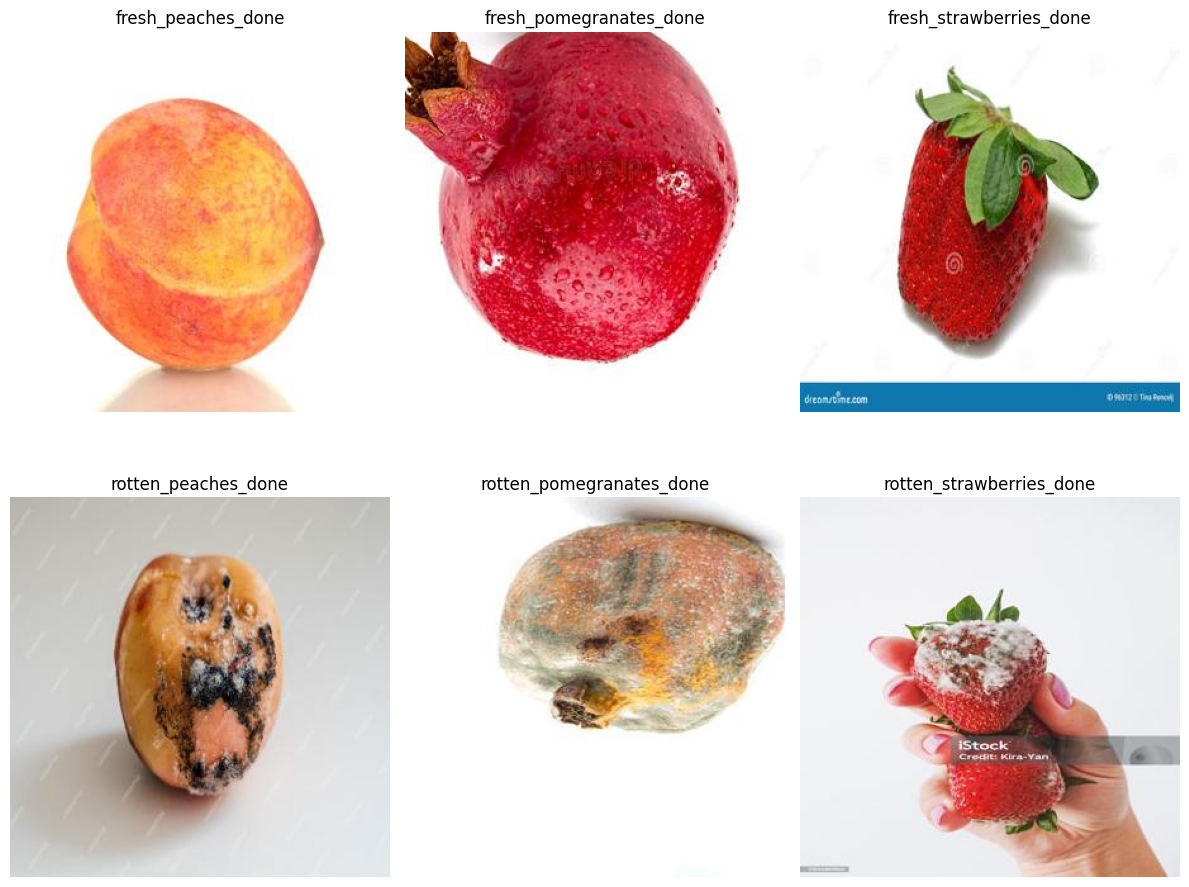

In [9]:
import os
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Set the path to your images
img_path = '/content/data'

# Get a list of labels and sort them
labels = os.listdir(img_path)
labels = sorted(labels)

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 10))

for i, label in enumerate(labels):  # Displaying only the first 6 labels for example
    # Get all images for the current label
    tot_images_for_each_label = list(Path(os.path.join(img_path, label)).glob("*.jpg"))

    # Choose a random image for each label (you can modify this as needed)
    random_image_path = tot_images_for_each_label[0]

    # Read and display the image
    img = mpimg.imread(str(random_image_path))
    axes[i // 3, i % 3].imshow(img)

    # Display label on top of the image
    axes[i // 3, i % 3].set_title(label)
    axes[i // 3, i % 3].axis('off')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()


In [10]:
import pandas as pd
# We convert the image paths and their label into a dataframe.
TARGET = [i.parent.stem for i in paths]

data = pd.DataFrame({'Image':paths,
                     'Target':TARGET})
data.head()

,Image,Target
0,data/fresh_peaches_done/fresh_peach_58.jpg,fresh_peaches_done
1,data/fresh_peaches_done/fresh_peach_104.jpg,fresh_peaches_done
2,data/fresh_peaches_done/fresh_peach_271.jpg,fresh_peaches_done
3,data/fresh_peaches_done/fresh_peach_255.jpg,fresh_peaches_done
4,data/fresh_peaches_done/fresh_peach_153.jpg,fresh_peaches_done


In [11]:
data['Image'][0] , data['Target'][0]

(PosixPath('data/fresh_peaches_done/fresh_peach_58.jpg'), 'fresh_peaches_done')

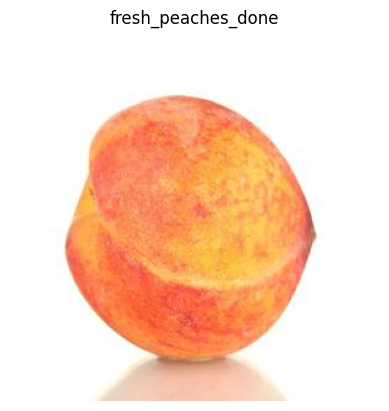

In [12]:
# Assuming you already have the 'data' DataFrame
image_path = data['Image'][0]
label = data['Target'][0]

# Read and display the image
img = mpimg.imread(str(image_path))

# Display the image with the label as the title
plt.imshow(img)
plt.title(label)
plt.axis('off')  # Turn off axis labels for better visualization
plt.show()


In [13]:
data['Target'].value_counts()

rotten_peaches_done         343
fresh_pomegranates_done     311
rotten_strawberries_done    251
fresh_peaches_done          250
fresh_strawberries_done     250
rotten_pomegranates_done    250
Name: Target, dtype: int64

In [68]:
from sklearn.model_selection import train_test_split
seed = 42
stratify = data['Target']
df_train , df_rest = train_test_split(data,test_size=0.3,random_state=seed,stratify=stratify)

df_val , df_test = train_test_split(df_rest,test_size=0.5,random_state=seed)

In [69]:
df_train['Target'].value_counts()

rotten_peaches_done         240
fresh_pomegranates_done     217
rotten_strawberries_done    176
fresh_strawberries_done     175
rotten_pomegranates_done    175
fresh_peaches_done          175
Name: Target, dtype: int64

In [70]:
df_val['Target'].value_counts()

rotten_peaches_done         50
fresh_pomegranates_done     49
rotten_strawberries_done    41
rotten_pomegranates_done    39
fresh_peaches_done          36
fresh_strawberries_done     33
Name: Target, dtype: int64

In [71]:
# creating a mapper
label2id = dict(zip(labels,range(len(labels))))
label2id

{'fresh_peaches_done': 0,
 'fresh_pomegranates_done': 1,
 'fresh_strawberries_done': 2,
 'rotten_peaches_done': 3,
 'rotten_pomegranates_done': 4,
 'rotten_strawberries_done': 5}

# lets create a class to return two things image and related target class

In [72]:
from torch.utils.data import Dataset , DataLoader
from PIL import Image
class Dataset_utils(Dataset):
  def __init__(self,data:pd.DataFrame,label2id:dict,transforms=None):

    self.data = data
    self.label2id = label2id
    self.transforms = transforms

  def __len__(self):
    return len(self.data)

  def __getitem__(self,idx):
    data_new = self.data.copy() # make a copy to modify freely
    data_new['Target'] = data_new['Target'].map(self.label2id)
    # now lets grab the image itself
    img_path = data_new.iloc[idx,0] #This line go to the dict and grabs the idx "PosixPath('data/fresh_pomegranates_done/fresh_pomegranate_47.jpg')"
    img = Image.open(img_path).convert('RGB')
    if self.transforms is not None:
      img = self.transforms(img)

    target = data_new.iloc[idx,1]

    return img , target

label : 0


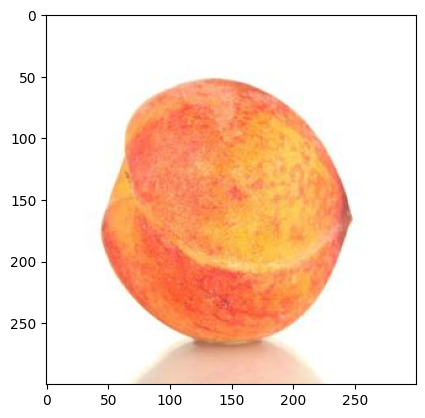

In [73]:
# lets see if this works fine
f = Dataset_utils(data,label2id)
bb , yy = f[0]
plt.imshow(bb)
print( f'label : {yy}')

# Now lets construct a pretrained model

In [110]:
from torchvision.models import vit_b_16 , resnet18
from torchvision.models import ViT_B_16_Weights , ResNet18_Weights

vit_model = vit_b_16(weights = ViT_B_16_Weights)
resnet18_model = resnet18(weights=ResNet18_Weights)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ViT_B_16_Weights.IMAGENET1K_V1`. You can also use `weights=ViT_B_16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [111]:
import torchvision.transforms as transforms

image_transform = transforms.Compose([
    transforms.Resize(232),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [112]:
train_dataset = Dataset_utils(df_train,label2id,image_transform)
val_dataset = Dataset_utils(df_val,label2id,image_transform)

torch.Size([3, 224, 224])
label : 1


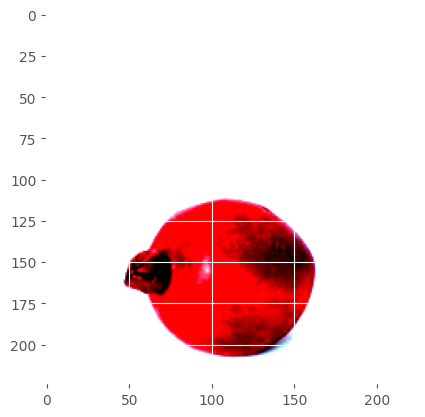

In [113]:
xx_train , yy_label = train_dataset[0]
# lets visualize something from the dataset
print(xx_train.shape)
p_train = xx_train.permute(1,2,0)
plt.imshow(p_train)
print(f'label : {yy_label}')

In [114]:
BS = 32 # standard batch size
num_worker = os.cpu_count()
print(num_worker)

train_dataloader = DataLoader(train_dataset,
                              batch_size=BS,
                              num_workers=num_worker,
                              shuffle=True)
test_dataloader = DataLoader(val_dataset,
                             batch_size=BS,
                             num_workers=num_worker,
                             shuffle=True)

2


In [115]:
# We visualize the dimensions of a batch.
batch_images, batch_labels = next(iter(train_dataloader))

batch_images.shape, batch_labels.shape

(torch.Size([32, 3, 224, 224]), torch.Size([32]))

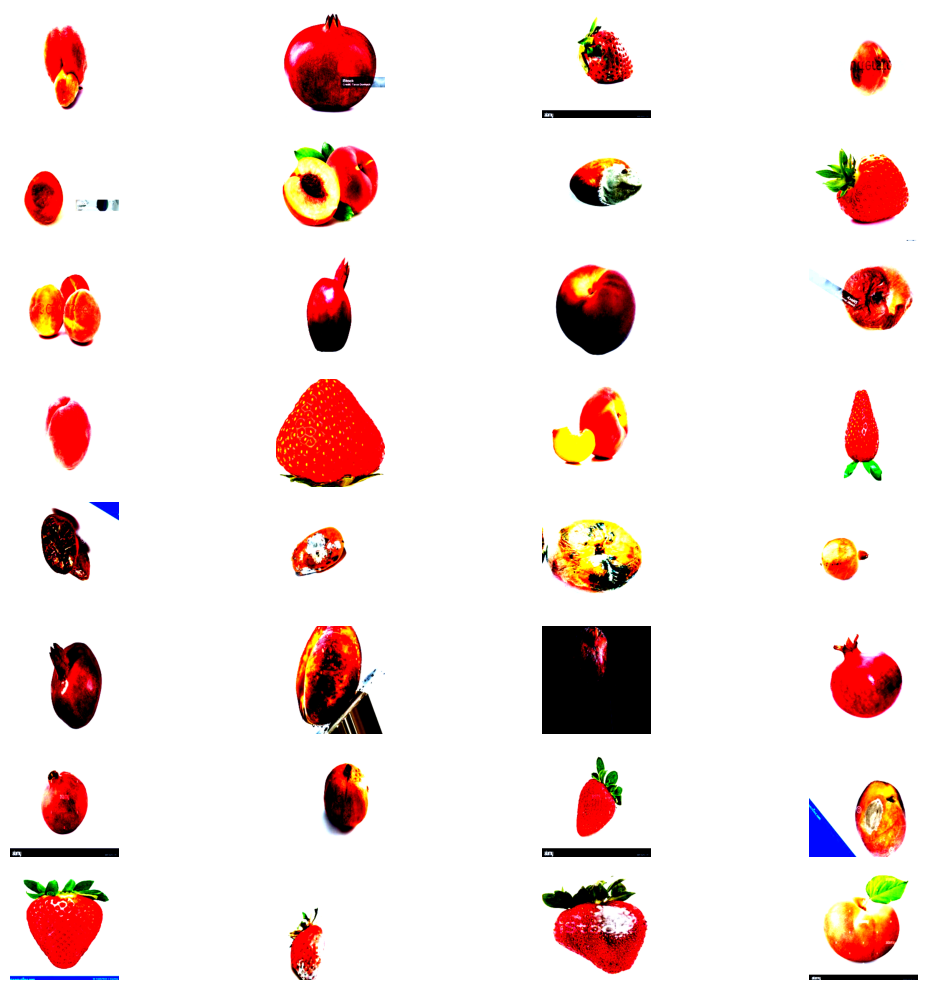

In [116]:
fig ,axs = plt.subplots(8,4,figsize=(12,10))
axs = axs.flat

for i , img in enumerate(batch_images):
  image = img.permute(1,2,0)
  axs[i].imshow(image)
  axs[i].axis('off')

fig.tight_layout()
fig.show()

In [117]:
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [118]:
from torchsummary import summary

# summary(resnet18_model,input_size=(3,224,224))

In [119]:
from torch import nn
# when you print this model you can see how different layers are constructed
resnet18_model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [120]:
# we will turn off models parameters
for param in resnet18_model.parameters():
  param.requires_grad = False
# print(resnet18_model.fc.out_features) -> print the out features of the resnet 18 model -> 1000 neuron
num_features = resnet18_model.fc.in_features # this is getting the 512 neurons
# now lets make an trainable mlp layer
resnet18_model.fc = nn.Sequential (
    nn.Linear(num_features,512),
    nn.LeakyReLU(0.2),
    nn.Linear(512,256),
    nn.LeakyReLU(0.2),
    nn.Linear(256,len(labels)),
)

# we will take the fc layer after modification and print it out
resnet18_model.fc

Sequential(
  (0): Linear(in_features=512, out_features=512, bias=True)
  (1): LeakyReLU(negative_slope=0.2)
  (2): Linear(in_features=512, out_features=256, bias=True)
  (3): LeakyReLU(negative_slope=0.2)
  (4): Linear(in_features=256, out_features=6, bias=True)
)

In [121]:
len(labels) , labels

(6,
 ['fresh_peaches_done',
  'fresh_pomegranates_done',
  'fresh_strawberries_done',
  'rotten_peaches_done',
  'rotten_pomegranates_done',
  'rotten_strawberries_done'])

In [122]:
# loss fun and optimizer
from torch.optim import lr_scheduler

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(resnet18_model.parameters(),lr=0.001)
lr_scheduler = lr_scheduler.StepLR(optimizer,step_size=5,gamma=0.1)

In [123]:
# make our early stopping class
class EarlyStopping:
  def __init__(self,patience:int=10,delta:float=0.0001,path='best_model.pth'):
    self.patience = patience
    self.delta = delta
    self.path = path
    self.best_score = None
    self.early_stop = False
    self.counter = 0

  def __call__(self,val_loss , model):
    if self.best_score is None:
      self.best_score = val_loss
      self.save_checkpoint(model)

    elif val_loss > self.best_score + self.delta:
      self.counter += 1
      if self.counter >= self.patience:
        self.early_stop = True

    else:
      self.best_score = val_loss
      self.save_checkpoint(model)
      self.counter = 0

  def save_checkpoint(self,model):
    torch.save(model.state_dict(),self.path)

In [124]:
early_stopping = EarlyStopping(patience = 10,delta = 0.)

# construct a training loop


In [125]:
from sklearn.metrics import balanced_accuracy_score, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [126]:
def train_step(model:torch.nn.Module,
               dataloader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               device='cpu'):
  model.train()

  train_loss = 0
  train_accuracy = 0

  for batch, (X,y) in enumerate(dataloader):
    X = X.to(device,dtype=torch.float32)
    y = y.to(device,dtype=torch.long) # dtype of the target y to torch.long assuming it represents class indices. This is the appropriate datatype for class labels.

    optimizer.zero_grad()

    y_pred_logits = model(X)

    loss= loss_fn(y_pred_logits,y)

    train_loss += loss.item()

    loss.backward()
    optimizer.step()

    y_pred_prob = y_pred_logits.softmax(dim=1) # turn predictions intp probability distribution
    y_pred_target = y_pred_prob.argmax(dim=1) # take the biggest index in the prob. dist. .. this is out right class ex: [0] -> fresh strawberry

    # print(f'this is true label : {y}')
    # print(f'this is predicted label : {y_pred_target}')

    train_accuracy += balanced_accuracy_score(y.cpu().numpy(),y_pred_target.detach().cpu().numpy(),adjusted=True)


  lr_scheduler.step()

  train_loss = train_loss / len(dataloader)
  train_accuracy = train_accuracy / len(dataloader)

  return train_loss , train_accuracy


In [127]:
def val_step(model:torch.nn.Module,
             dataloader:torch.utils.data.DataLoader,
             loss_fn:torch.nn.Module,
             device='cpu'):

  model.eval()

  val_loss = 0
  val_accuracy = 0

  with torch.inference_mode():
    for batch , (X,y) in enumerate (dataloader):
      X = X.to(device,dtype=torch.flaot32)
      y = y.to(device,dtype=torch.long)

      y_pred_logits = model(X)

      loss = loss_fn(y_pred_logits,y)
      va_loss += loss.item()

      y_pred_prob = y_pred_logits.softmax(dim=1)
      y_pred_target = y_pred_prob.argmax(dim=1)

      val_accuracy += balanced_accuracy_score(y.cpu().numpy(),y_pred_target.detach().cpu().numpy(),adjusted=True)

  val_loss = val_loss / len(dataloader)
  val_accuracy = val_accuracy / len(dataloader)

  return val_loss , val_accuracy

In [128]:
from tqdm import tqdm_notebook
def Train(model:torch.nn.Module,
          train_dataloader:torch.utils.data.DataLoader,
          val_dataloader:torch.utils.data.DataLoader,
          loss_fn:torch.nn.Module,
          optimizer:torch.optim.Optimizer,
          early_stopping,epochs:int=10,
          device='cpu'):
  results = {
      'train_loss' : [],
      'train_accuracy' : [],
      'val_loss' : [],
      'val_accuracy' : []
  }
  for epoch in tqdm_notebook(range(epochs)):

    train_loss , train_accuracy = train_step(model=model,
                                             dataloader=train_dataloader,
                                             loss_fn=loss_fn,
                                             optimizer=optimizer,
                                             device=device)

    val_loss , val_accuracy = train_step(model=model,
                                             dataloader=val_dataloader,
                                             loss_fn=loss_fn,
                                             optimizer=optimizer,
                                             device=device)
    print(f'Epoch : {epoch+1} | train loss : {train_loss:.4f} | train accuracy : {train_accuracy:.4f} | val loss : {val_loss:.4f} | val accuracy : {val_accuracy:.4f}')

    early_stopping(val_loss,model)

    if early_stopping.early_stop == True:
      print('Early stopping')
      break

    results['train_loss'].append(train_loss)
    results['train_accuracy'].append(train_accuracy)
    results['val_loss'].append(val_loss)
    results['val_accuracy'].append(val_accuracy)

  return results

In [129]:
def manual_seed(seed):
  torch.cuda.manual_seed(seed)
  torch.manual_seed(seed)

In [130]:
epochs = 30
results = Train(resnet18_model.to(device),
                train_dataloader=train_dataloader,
                val_dataloader=test_dataloader,
                loss_fn=loss_fn,
                optimizer=optimizer,
                early_stopping=early_stopping,
                device=device,
                epochs=epochs)

<ipython-input-128-03a08a12188e>:15: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm_notebook(range(epochs)):


  0%|          | 0/30 [00:00<?, ?it/s]

Epoch : 1 | train loss : 0.8001 | train accuracy : 0.6796 | val loss : 0.8450 | val accuracy : 0.6959


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Epoch : 2 | train loss : 0.3678 | train accuracy : 0.8329 | val loss : 0.6033 | val accuracy : 0.7402


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Epoch : 3 | train loss : 0.2739 | train accuracy : 0.8965 | val loss : 0.3369 | val accuracy : 0.8331
Epoch : 4 | train loss : 0.1642 | train accuracy : 0.9456 | val loss : 0.2741 | val accuracy : 0.8998


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Epoch : 5 | train loss : 0.1608 | train accuracy : 0.9366 | val loss : 0.2839 | val accuracy : 0.8832


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Epoch : 6 | train loss : 0.1628 | train accuracy : 0.9497 | val loss : 0.2562 | val accuracy : 0.8800


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Epoch : 7 | train loss : 0.1594 | train accuracy : 0.9351 | val loss : 0.2548 | val accuracy : 0.9031


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Epoch : 8 | train loss : 0.1444 | train accuracy : 0.9510 | val loss : 0.2595 | val accuracy : 0.9025
Epoch : 9 | train loss : 0.1505 | train accuracy : 0.9509 | val loss : 0.2497 | val accuracy : 0.8804


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Epoch : 10 | train loss : 0.1357 | train accuracy : 0.9506 | val loss : 0.2412 | val accuracy : 0.9186
Epoch : 11 | train loss : 0.1602 | train accuracy : 0.9427 | val loss : 0.2648 | val accuracy : 0.8898


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Epoch : 12 | train loss : 0.1576 | train accuracy : 0.9376 | val loss : 0.2277 | val accuracy : 0.9176
Epoch : 13 | train loss : 0.1403 | train accuracy : 0.9614 | val loss : 0.2455 | val accuracy : 0.9145


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Epoch : 14 | train loss : 0.1462 | train accuracy : 0.9514 | val loss : 0.2273 | val accuracy : 0.8792


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Epoch : 15 | train loss : 0.1644 | train accuracy : 0.9444 | val loss : 0.2643 | val accuracy : 0.8817


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Epoch : 16 | train loss : 0.1432 | train accuracy : 0.9597 | val loss : 0.2198 | val accuracy : 0.8905


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Epoch : 17 | train loss : 0.1584 | train accuracy : 0.9452 | val loss : 0.2793 | val accuracy : 0.8966
Epoch : 18 | train loss : 0.1530 | train accuracy : 0.9483 | val loss : 0.2263 | val accuracy : 0.9057


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Epoch : 19 | train loss : 0.1623 | train accuracy : 0.9427 | val loss : 0.2675 | val accuracy : 0.8925
Epoch : 20 | train loss : 0.1397 | train accuracy : 0.9476 | val loss : 0.2436 | val accuracy : 0.8997


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Epoch : 21 | train loss : 0.1501 | train accuracy : 0.9399 | val loss : 0.2228 | val accuracy : 0.9074


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Epoch : 22 | train loss : 0.1797 | train accuracy : 0.9170 | val loss : 0.2120 | val accuracy : 0.9110
Epoch : 23 | train loss : 0.1562 | train accuracy : 0.9351 | val loss : 0.2523 | val accuracy : 0.8786


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Epoch : 24 | train loss : 0.1728 | train accuracy : 0.9469 | val loss : 0.2484 | val accuracy : 0.8875


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Epoch : 25 | train loss : 0.1685 | train accuracy : 0.9396 | val loss : 0.2444 | val accuracy : 0.9100


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Epoch : 26 | train loss : 0.1471 | train accuracy : 0.9514 | val loss : 0.3235 | val accuracy : 0.8563


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Epoch : 27 | train loss : 0.1583 | train accuracy : 0.9441 | val loss : 0.2521 | val accuracy : 0.8954


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Epoch : 28 | train loss : 0.1616 | train accuracy : 0.9441 | val loss : 0.2406 | val accuracy : 0.9199


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Epoch : 29 | train loss : 0.1418 | train accuracy : 0.9501 | val loss : 0.2853 | val accuracy : 0.8653


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Epoch : 30 | train loss : 0.1666 | train accuracy : 0.9349 | val loss : 0.2308 | val accuracy : 0.9158


In [131]:
# We define a function to visualize the evolution of the loss and the metric.
def loss_and_metric_plot(results:dict):

    plt.style.use('ggplot')
    training_loss = results['train_loss']
    training_metric = results['train_accuracy']

    validation_loss = results['val_loss']
    validation_metric = results['val_accuracy']

    fig,ax = plt.subplots(nrows = 1, ncols = 2, figsize = (9,3.8))
    ax = ax.flat

    ax[0].plot(training_loss, 'o-', markersize = 4, label = "Train")
    ax[0].plot(validation_loss, label = "Val")
    ax[0].set_title("CrossEntropyLoss", fontsize = 12, fontweight = "bold", color = "black")
    ax[0].set_xlabel("Epoch", fontsize = 10, fontweight = "bold", color = "black")
    ax[0].set_ylabel("loss", fontsize = 10, fontweight = "bold", color = "black")

    ax[1].plot(training_metric, 'o-',markersize = 4, label = "Train")
    ax[1].plot(validation_metric, label = "Val")
    ax[1].set_title("Balanced Accuracy", fontsize = 12, fontweight = "bold", color = "black")
    ax[1].set_xlabel("Epoch", fontsize = 10, fontweight = "bold", color = "black")
    ax[1].set_ylabel("score", fontsize = 10, fontweight = "bold", color = "black")

    ax[0].legend()
    ax[1].legend()
    fig.tight_layout()
    fig.show()

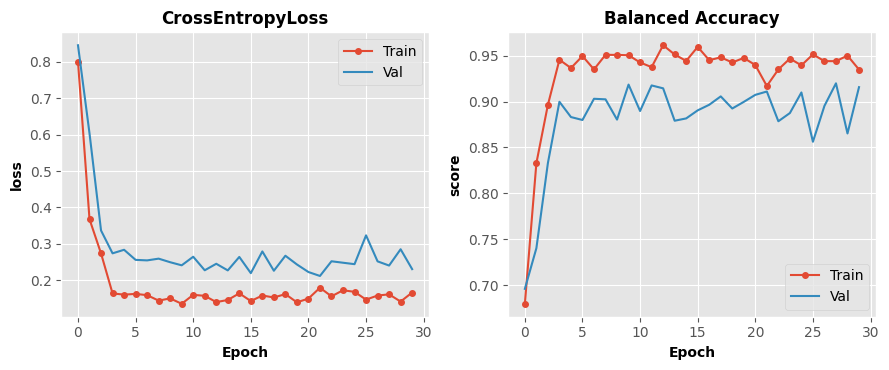

In [132]:
loss_and_metric_plot(results)

In [149]:
def predictions(test_dataloader:torch.utils.data.DataLoader):

    checkpoint = torch.load("/content/best_model.pth")

    loaded_model = resnet18()

    num_features = loaded_model.fc.in_features # this is getting the 512 neurons
    # now lets insert the same mlp layer used in training
    # print(loaded_model)
    loaded_model.fc = nn.Sequential(
    nn.Linear(num_features,512),
    nn.LeakyReLU(0.2),
    nn.Linear(512,256),
    nn.LeakyReLU(0.2),
    nn.Linear(256,len(labels)))

    # loaded_model.fc = nn.Linear(in_features = 2048, out_features = output_shape)

    loaded_model.load_state_dict(checkpoint)

    loaded_model.to(device = device)

    loaded_model.eval()

    y_pred_test = []

    with torch.inference_mode():
        for X,_ in tqdm_notebook(test_dataloader):
            X = X.to(device = device, dtype = torch.float32)
            y_pred_logit = loaded_model(X)
            y_pred_prob = y_pred_logit.softmax(dim = 1)
            y_pred_class = y_pred_prob.argmax(dim = 1)
            y_pred_test.append(y_pred_class.detach().cpu())

    y_pred_test = torch.cat(y_pred_test)

    return y_pred_test

In [150]:
# We create our Test Dataset and Test DataLoader.
test_dataset = Dataset_utils(df_test, label2id, image_transform)

test_dataloader = DataLoader(dataset = test_dataset, batch_size = BS,
                             shuffle = False, num_workers = num_worker)

In [151]:
y_pred_test = predictions(test_dataloader)

<ipython-input-149-21d91fd9c501>:28: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for X,_ in tqdm_notebook(test_dataloader):


  0%|          | 0/8 [00:00<?, ?it/s]

In [153]:
test_bal_accuracy = balanced_accuracy_score(df_test['Target'].map(label2id), y_pred_test.numpy())

print(f"Balanced Accuracy Test = {test_bal_accuracy:.4f}")

Balanced Accuracy Test = 0.8905


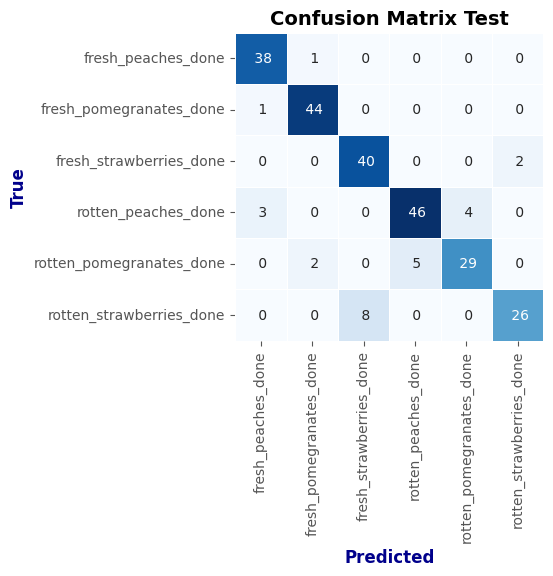

In [154]:
import seaborn as sns
cf_mx_test = confusion_matrix(df_test['Target'].map(label2id), y_pred_test.numpy())

fig,ax = plt.subplots(figsize = (6,4))
sns.set_style('dark')
sns.heatmap(cf_mx_test, cmap = 'Blues', fmt = ' ', annot = True, cbar = False, square = True, linewidths = 0.4,
            xticklabels = labels, yticklabels = labels, ax = ax)
ax.set_ylabel("True", color = "darkblue", fontsize = 12, fontweight = "bold")
ax.set_xlabel("Predicted", color = "darkblue", fontsize = 12, fontweight = "bold")
ax.set_title("Confusion Matrix Test", fontsize = 14, fontweight = "bold", color = "black")

fig.show()

In [157]:
print("##" * 35)
print(" " * 20, "Classification report")
print("##" * 35)
print(classification_report(df_test['Target'].map(label2id), y_pred_test.numpy(), target_names = labels))

######################################################################
                     Classification report
######################################################################
                          precision    recall  f1-score   support

      fresh_peaches_done       0.90      0.97      0.94        39
 fresh_pomegranates_done       0.94      0.98      0.96        45
 fresh_strawberries_done       0.83      0.95      0.89        42
     rotten_peaches_done       0.90      0.87      0.88        53
rotten_pomegranates_done       0.88      0.81      0.84        36
rotten_strawberries_done       0.93      0.76      0.84        34

                accuracy                           0.90       249
               macro avg       0.90      0.89      0.89       249
            weighted avg       0.90      0.90      0.89       249

